In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

# URL endpoint for the CoinMarketCap API
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

# Parameters for the API request:
# start at the first cryptocurrency
# retrieve data for 15 cryptocurrencies
# convert market data to USD
parameters = {
  'start':'1', 
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

# Create a session object and set headers
session = Session()
session.headers.update(headers)

# Send GET request to the API endpoint with provided parameters
try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)

# Catch and print any request errors to the console
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [2]:
type(data)

dict

In [3]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,10098,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.932111e+07,1.932111e+07,NaN,1,NaN,NaN,None,2023-03-18T17:56:00.000Z,27343.890262,4.266525e+10,-3.9696,-0.132221,3.115350,33.825720,9.776874,28.944417,63.566024,5.283144e+11,45.5648,5.742217e+11,None,2023-03-18T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-18 17:58:53.423494
1,1027,Ethereum,ETH,ethereum,6588,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,None,2023-03-18T17:56:00.000Z,1786.871127,1.165444e+10,5.0242,-0.550008,3.404776,22.335042,4.087843,13.475055,51.541696,2.186663e+11,18.8533,2.186663e+11,None,2023-03-18T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-18 17:58:53.423494
2,825,Tether,USDT,tether,49639,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.618102e+10,7.909174e+10,NaN,3,NaN,NaN,None,2023-03-18T17:56:00.000Z,1.002294,5.529933e+10,-29.9497,-0.020248,0.029034,-0.692167,0.205323,0.213274,0.210856,7.635578e+10,6.5900,7.927318e+10,None,2023-03-18T17:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-03-18 17:58:53.423494
3,1839,BNB,BNB,bnb,1215,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.578914e+08,1.599800e+08,NaN,4,NaN,NaN,None,2023-03-18T17:56:00.000Z,335.279881,9.077344e+08,-4.5125,-0.347958,0.703850,21.827898,4.239944,10.962985,35.743672,5.293779e+10,4.5657,5.363806e+10,None,2023-03-18T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-18 17:58:53.423494
4,3408,USD Coin,USDC,usd-coin,10952,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.626628e+10,3.626628e+10,NaN,5,NaN,NaN,None,2023-03-18T17:56:00.000Z,0.999611,5.620124e+09,-15.3812,-0.009684,-0.016403,5.222227,-0.039630,-0.046607,-0.042898,3.625218e+10,3.1256,3.625218e+10,None,2023-03-18T17:56:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-03-18 17:58:53.423494
5,52,XRP,XRP,xrp,904,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,None,2023-03-18T17:56:00.000Z,0.378269,9.578649e+08,-0.1525,-0.268183,1.187434,3.480709,-5.236766,-2.571708,8.320295,1.927313e+10,1.6622,3.782685e+10,None,2023-03-18T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-18 17:58:53.423494
6,2010,Cardano,ADA,cardano,706,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.470723e+10,3.559146e+10,NaN,7,NaN,NaN,None,2023-03-18T17:56:00.000Z,0.342087,4.065141e+08,1.5778,-0.908793,1.289952,11.174268,-16.475202,-2.725906,28.882141,1.187288e+10,1.0247,1.539390e+10,None,2023-03-18T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-18 17:58:53.423494
7,3890,Polygon,MATIC,polygon,615,2019-04-28T00:00:00.000Z,"[platform, enterprise-solutions, zero-knowledg...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,8,NaN,NaN,None,2023-03-18T17:56:00.000Z,1.199180,5.950464e+08,21.5946,-0.703657,1.255396,15.996492,-17.002939,18.619641,48.372489,1.047402e+10,0.9031,1.199180e+10,None,2023-03-18T17:56:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-03-18 17:58:53.423494
8,74,Dogecoin,DOGE,dogecoin,660,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,1.326708e+11,1.326708e+11,NaN,9,NaN,NaN,None,2023-03-18T

In [5]:
#This function loads the response data into a JSON object and then normalizes the JSON data into a Pandas DataFrame using the pd.json_normalize() method.
#A new column is added to the DataFrame called "timestamp", which contains the current date and time.
#Finally, the function writes the DataFrame to a CSV file at the provided file path. If the file already exists, the new data is appended to the end of the file. 
#If the file does not exist, a new file is created.
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    df = pd.json_normalize(data['data'])
    df['timestamp'] = pd.to_datetime('now')
    df
    
    if not os.path.isfile(r'/Users/sebastian/Desktop/Sebastian/Studia/Kursy/Alex The Analyst Bootcamp/API.csv'):
        df.to_csv(r'/Users/sebastian/Desktop/Sebastian/Studia/Kursy/Alex The Analyst Bootcamp/API.csv')
    else:
        df.to_csv(r'/Users/sebastian/Desktop/Sebastian/Studia/Kursy/Alex The Analyst Bootcamp/API.csv', mode='a', header=False)
        

In [6]:
#This script provides a simple and effective way to gather up-to-date cryptocurrency market data
#from the CoinMarketCap API in an automated and periodic manner.
import os
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed


KeyboardInterrupt: 

In [7]:
df = pd.read_csv(r'/Users/sebastian/Desktop/Sebastian/Studia/Kursy/Alex The Analyst Bootcamp/API.csv')
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9994,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",2.100000e+07,1.930422e+07,1.930422e+07,NaN,1,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,23558.230910,2.109609e+10,-0.9814,0.461050,0.119839,-3.816040,0.217798,42.294294,39.626268,4.547734e+11,42.2760,4.947228e+11,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
1,1,1027,Ethereum,ETH,ethereum,6512,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.223739e+08,1.223739e+08,NaN,2,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,1642.497473,6.463404e+09,-9.2567,0.430558,-0.074270,-1.607996,2.030129,37.444419,29.556506,2.009988e+11,18.6828,2.009988e+11,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
2,2,825,Tether,USDT,tether,48498,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,7.093013e+10,7.314177e+10,NaN,3,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,1.000095,3.006883e+10,1.4978,-0.006484,-0.000471,-0.009347,-0.015327,0.039338,0.010963,7.093688e+10,6.5936,7.314872e+10,NaN,2023-02-28T16:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-28 16:15:39.288463
3,3,1839,BNB,BNB,bnb,1201,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.578953e+08,1.599800e+08,NaN,4,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,304.745081,3.443079e+08,-14.0037,0.349399,0.399412,-2.461045,-4.222373,24.251472,2.452592,4.811782e+10,4.4725,4.875311e+10,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
4,4,3408,USD Coin,USDC,usd-coin,10383,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,4.243397e+10,4.243397e+10,NaN,5,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,1.000008,3.125275e+09,1.8543,0.008130,0.023274,0.028607,0.018154,0.002902,-0.011997,4.243433e+10,3.9443,4.243433e+10,NaN,2023-02-28T16:13:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-28 16:15:39.288463
5,5,52,XRP,XRP,xrp,895,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",1.000000e+11,5.095091e+10,9.998911e+10,NaN,6,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,0.379946,1.012259e+09,11.2010,0.606217,0.737749,-2.187441,-7.753989,11.747816,-5.474142,1.935858e+10,1.7994,3.799457e+10,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
6,6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",4.500000e+10,3.466756e+10,3.552041e+10,NaN,7,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,0.363676,2.146470e+08,-10.2884,0.582310,-0.547835,-7.179220,-6.384372,49.096066,15.668260,1.260775e+10,1.1719,1.636540e+10,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
7,7,74,Dogecoin,DOGE,dogecoin,646,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,1.326708e+11,1.326708e+11,NaN,8,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,0.081961,3.250791e+08,27.4421,0.235503,0.733776,-4.529953,-8.584248,20.921798,-21.120555,1.087386e+10,1.0107,1.087386e+10,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
8,8,3890,Polygon,MATIC,polygon,594,2019-04-28T00:00:00.000Z,"['platform', 'enterprise-solutions', 'zero-kno...",1.000000e+10,8.734317e+09,1.000000e+10,NaN,9,NaN,NaN,NaN,2023-

In [8]:
#Use a lambda function to specify that floating-point numbers should be displayed with 5 decimal places. 
#This can be useful for improving the readability of tables with floating-point data by reducing the number of decimal places displayed.
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,0,1,Bitcoin,BTC,bitcoin,9994,2013-04-28T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19304225.00000,19304225.00000,NaN,1,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,23558.23091,21096093344.30005,-0.98140,0.46105,0.11984,-3.81604,0.21780,42.29429,39.62627,454773390086.87329,42.27600,494722849108.13000,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
1,1,1027,Ethereum,ETH,ethereum,6512,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122373866.21780,122373866.21780,NaN,2,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,1642.49747,6463403504.10587,-9.25670,0.43056,-0.07427,-1.60800,2.03013,37.44442,29.55651,200998766001.65457,18.68280,200998766001.64999,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
2,2,825,Tether,USDT,tether,48498,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,70930128835.38470,73141766321.23428,NaN,3,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,1.00010,30068830568.99114,1.49780,-0.00648,-0.00047,-0.00935,-0.01533,0.03934,0.01096,70936875298.78459,6.59360,73148723142.78999,NaN,2023-02-28T16:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2023-02-28 16:15:39.288463
3,3,1839,BNB,BNB,bnb,1201,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,157895307.05657,159979963.59043,NaN,4,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,304.74508,344307878.91070,-14.00370,0.34940,0.39941,-2.46105,-4.22237,24.25147,2.45259,48117818211.38881,4.47250,48753107036.62000,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
4,4,3408,USD Coin,USDC,usd-coin,10383,2018-10-08T00:00:00.000Z,"['medium-of-exchange', 'stablecoin', 'asset-ba...",NaN,42433970986.84748,42433970986.84748,NaN,5,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,1.00001,3125274967.90163,1.85430,0.00813,0.02327,0.02861,0.01815,0.00290,-0.01200,42434327977.74530,3.94430,42434327977.75000,NaN,2023-02-28T16:13:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2023-02-28 16:15:39.288463
5,5,52,XRP,XRP,xrp,895,2013-08-04T00:00:00.000Z,"['medium-of-exchange', 'enterprise-solutions',...",100000000000.00000,50950912949.00000,99989113908.00000,NaN,6,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,0.37995,1012258872.57013,11.20100,0.60622,0.73775,-2.18744,-7.75399,11.74782,-5.47414,19358581259.30318,1.79940,37994571910.18000,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
6,6,2010,Cardano,ADA,cardano,658,2017-10-01T00:00:00.000Z,"['dpos', 'pos', 'platform', 'research', 'smart...",45000000000.00000,34667560691.12200,35520414310.28900,NaN,7,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,0.36368,214647009.78982,-10.28840,0.58231,-0.54783,-7.17922,-6.38437,49.09607,15.66826,12607746033.83783,1.17190,16365402128.45000,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
7,7,74,Dogecoin,DOGE,dogecoin,646,2013-12-15T00:00:00.000Z,"['mineable', 'pow', 'scrypt', 'medium-of-excha...",NaN,132670764299.89407,132670764299.89407,NaN,8,NaN,NaN,NaN,2023-02-28T16:13:00.000Z,0.08196,325079124.28038,27.44210,0.23550,0.73378,-4.52995,-8.58425,20.92180,-21.12056,10873857601.40489,1.01070,10873857601.40000,NaN,2023-02-28T16:13:00.000Z,NaN,NaN,NaN,NaN,NaN,2023-02-28 16:15:39.288463
8,8,3890,P

In [23]:
#We group the DataFrame df by the column 'name', and calculate the mean of the columns listed below:
df1 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()

In [11]:
df2 = df1.stack()

df2

name                                     
Bitcoin      quote.USD.percent_change_1h      0.26029
             quote.USD.percent_change_24h     1.11866
             quote.USD.percent_change_7d      5.57420
             quote.USD.percent_change_30d     2.53556
             quote.USD.percent_change_60d    38.93294
             quote.USD.percent_change_90d    45.53176
Ethereum     quote.USD.percent_change_1h      0.15504
             quote.USD.percent_change_24h     0.92241
             quote.USD.percent_change_7d      4.33986
             quote.USD.percent_change_30d     2.48368
             quote.USD.percent_change_60d    31.44334
             quote.USD.percent_change_90d    34.95470
Tether       quote.USD.percent_change_1h     -0.00793
             quote.USD.percent_change_24h     0.00833
             quote.USD.percent_change_7d     -0.17857
             quote.USD.percent_change_30d     0.04214
             quote.USD.percent_change_60d     0.08488
             quote.USD.percent_change_90

In [12]:
type(df2)

pandas.core.series.Series

In [13]:
type(df1)

pandas.core.frame.DataFrame

In [14]:
#We convert the Series df2 to a DataFrame df3 with a single column named 'values'.
df3 = df2.to_frame(name='values')
df3

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.26029
            quote.USD.percent_change_24h   1.11866
            quote.USD.percent_change_7d    5.57420
            quote.USD.percent_change_30d   2.53556
            quote.USD.percent_change_60d  38.93294
            quote.USD.percent_change_90d  45.53176
Ethereum    quote.USD.percent_change_1h    0.15504
            quote.USD.percent_change_24h   0.92241
            quote.USD.percent_change_7d    4.33986
            quote.USD.percent_change_30d   2.48368
            quote.USD.percent_change_60d  31.44334
            quote.USD.percent_change_90d  34.95470
Tether      quote.USD.percent_change_1h   -0.00793
            quote.USD.percent_change_24h   0.00833
            quote.USD.percent_change_7d   -0.17857
            quote.USD.percent_change_30d   0.04214
            quote.USD.percent_change_60d   0.08488
            quote.USD.percent_change_90d   0.06270
BNB         quote.USD.percent_change_1h    0.14705
            quote.USD.percent_change_24h   0.59051
            quote.USD.percent_change_7d    3.53435
            quote.USD.percent_change_30d  -2.16232
            quote.USD.percent_change_60d  20.91115
            quote.USD.percent_change_90d  10.74008
USD Coin    quote.USD.percent_change_1h   -0.00240
            quote.USD.percent_change_24h   0.01472
            quote.USD.percent_change_7d    1.31846
            quote.USD.percent_change_30d  -0.00243
            quote.USD.percent_change_60d  -0.01446
            quote.USD.percent_change_90d  -0.02310
XRP         quote.USD.percent_change_1h    0.37422
            quote.USD.percent_change_24h   0.97203
            quote.USD.percent_change_7d   -0.83040
            quote.USD.percent_change_30d  -7.16253
            quote.USD.percent_change_60d   8.14601
            quote.USD.percent_change_90d  -2.06264
Cardano     quote.USD.percent_change_1h    0.14296
            quote.USD.percent_change_24h   0.05127
            quote.USD.percent_change_7d   -2.67288
            quote.USD.percent_change_30d  -8.98335
            quote.USD.percent_change_60d  36.07841
            quote.USD.percent_change_90d  18.88371
Dogecoin    quote.USD.percent_change_1h   -0.01456
            quote.USD.percent_change_24h   0.67536
            quote.USD.percent_change_7d   -0.02553
            quote.USD.percent_change_30d -10.80635
            quote.USD.percent_change_60d  13.02871
            quote.USD.percent_change_90d -17.06287
Polygon     quote.USD.percent_change_1h    0.37455
            quote.USD.percent_change_24h  -0.84985
            quote.USD.percent_change_7d   -3.94473
            quote.USD.percent_change_30d  -0.35546
            quote.USD.percent_change_60d  52.77517
            quote.USD.percent_change_90d  42.94526
Binance USD quote.USD.percent_change_1h   -0.01127
            quote.USD.percent_change_24h   0.04113
            quote.USD.percent_change_7d   -0.00618
            quote.USD.percent_change_30d   0.01954
            quote.USD.percent_change_60d  -0.00965
            quote.USD.percent_change_90d   0.03304
Solana      quote.USD.percent_change_1h    0.26739
            quote.USD.percent_change_24h   0.93011
            quote.USD.percent_change_7d   -1.26405
            quote.USD.percent_change_30d  -8.15261
            quote.USD.percent_change_60d 101.06297
            quote.USD.percent_change_90d  69.87397
Polkadot    quote.USD.percent_change_1h    0.23753
            quote.USD.percent_change_24h  -1.73084
            quote.USD.percent_change_7d   -3.03902
            quote.USD.percent_change_30d  -1.64213
            quote.USD.percent_change_60d  40.04924
            quote.USD.percent_change_90d  24.67910
Litecoin    quote.USD.percent_change_1h    0.42082
            quote.USD.percent_change_24h   1.85984
            quote.USD.percent_change_7d    7.24890
            quote.USD.percent_change_30d  -4.08416
            quote.USD.percent_change_60d  30.42781
            quo

In [15]:
df3.count()

values    90
dtype: int64

In [16]:
#A new DataFrame df4 is created with the result of the reset_index() function. 
#The new DataFrame contains an additional column named "index" containing the values of the previous index of df3,
#and the data from the "values" column is preserved.
index = pd.Index(range(90))

df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.26029
1,Bitcoin,quote.USD.percent_change_24h,1.11866
2,Bitcoin,quote.USD.percent_change_7d,5.57420
3,Bitcoin,quote.USD.percent_change_30d,2.53556
4,Bitcoin,quote.USD.percent_change_60d,38.93294
5,Bitcoin,quote.USD.percent_change_90d,45.53176
6,Ethereum,quote.USD.percent_change_1h,0.15504
7,Ethereum,quote.USD.percent_change_24h,0.92241
8,Ethereum,quote.USD.percent_change_7d,4.33986
9,Ethereum,quote.USD.percent_change_30d,2.48368


In [17]:
df5 = df4.rename(columns={'level_1': 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.26029
1,Bitcoin,quote.USD.percent_change_24h,1.11866
2,Bitcoin,quote.USD.percent_change_7d,5.57420
3,Bitcoin,quote.USD.percent_change_30d,2.53556
4,Bitcoin,quote.USD.percent_change_60d,38.93294
5,Bitcoin,quote.USD.percent_change_90d,45.53176
6,Ethereum,quote.USD.percent_change_1h,0.15504
7,Ethereum,quote.USD.percent_change_24h,0.92241
8,Ethereum,quote.USD.percent_change_7d,4.33986
9,Ethereum,quote.USD.percent_change_30d,2.48368


In [18]:
df5['percent_change'] = df5['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df5

,name,percent_change,values
0,Bitcoin,1h,0.26029
1,Bitcoin,24h,1.11866
2,Bitcoin,7d,5.57420
3,Bitcoin,30d,2.53556
4,Bitcoin,60d,38.93294
5,Bitcoin,90d,45.53176
6,Ethereum,1h,0.15504
7,Ethereum,24h,0.92241
8,Ethereum,7d,4.33986
9,Ethereum,30d,2.48368


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

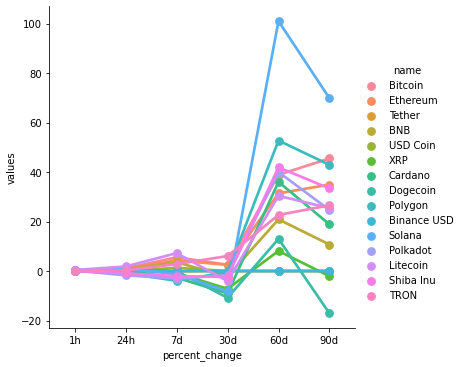

In [20]:
#The plot shows the mean percentage change values for different cryptocurrencies, 
#grouped by their respective percent change periods (1 hour, 24 hours, 7 days, 30 days, 60 days, and 90 days).
sns.catplot(x='percent_change', y='values', hue='name', data=df5, kind = 'point')

In [21]:
df6 = df[['name', 'quote.USD.price', 'timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,23558.23091,2023-02-28 16:15:39.288463
15,Bitcoin,23548.65075,2023-02-28 16:16:39.802790
30,Bitcoin,23528.47061,2023-02-28 16:17:40.325580
45,Bitcoin,27343.89026,2023-03-18 17:58:53.983732


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

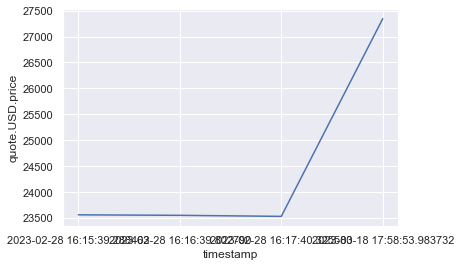

In [22]:
#A line plot showing the historical price of Bitcoin over time.
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data = df6)